!pip install yfinance pandas numpy matplotlib

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dowloading the Stock Data

In [32]:
#getting the real srock prices for calc rsi and build the startegy
data = yf.download('BAC' , start = '2021-01-01' , end = '2022-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BAC']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,BAC
Date,,,,,,


# Calculating the RSI

In [34]:
# function to calculate the RSI
def calc_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss 
    return 100 - (100 / (1 + rs))

# apply it to the correct column
data['RSI'] = calc_rsi(data['Close'])

 # Creating Buy/Sell Signals 

In [36]:
data['Signal'] = 0 
data.loc[data['RSI']< 30 , 'Signal']  = 1
data.loc[data['RSI']> 70 , 'Signal']  = -1

data['Position'] = data['Signal'].diff()

# Plotting thr RSI strategy

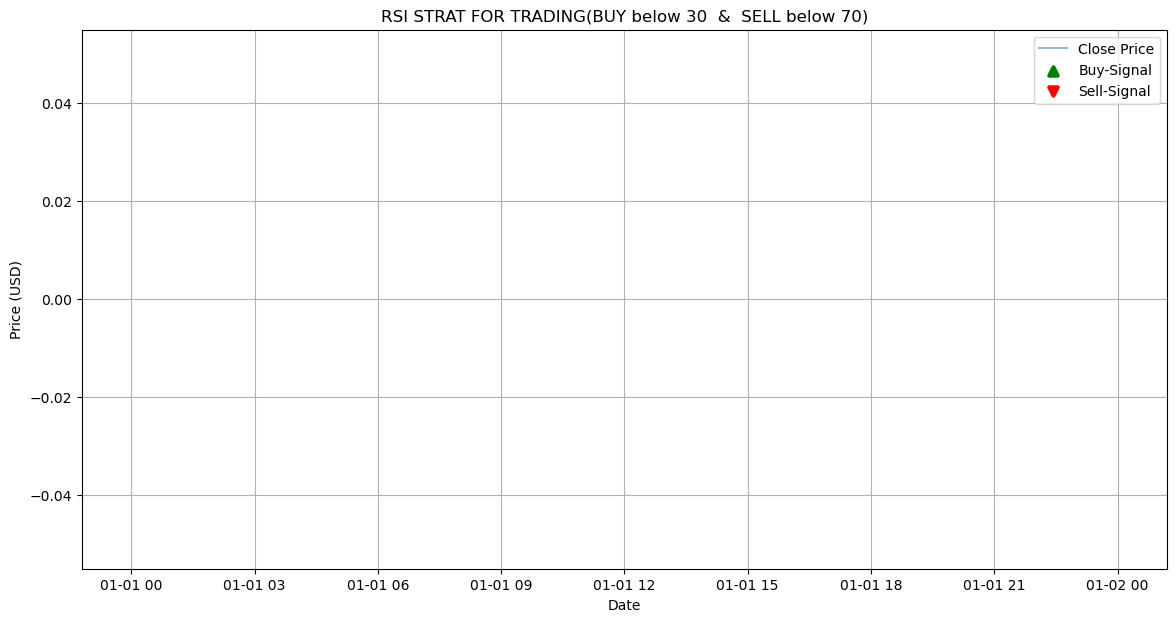

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Position'] == 1],
            data['Close'][data['Position'] == 1],
            label='Buy-Signal', marker='^', color='green', lw=3)
plt.scatter(data.index[data['Position'] == -1],
            data['Close'][data['Position'] == -1],
            label='Sell-Signal', marker='v', color='red', lw=3)  
plt.title('RSI STRAT FOR TRADING(BUY below 30  &  SELL below 70)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# Calculating the Strategy on Return 

In [40]:
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position']

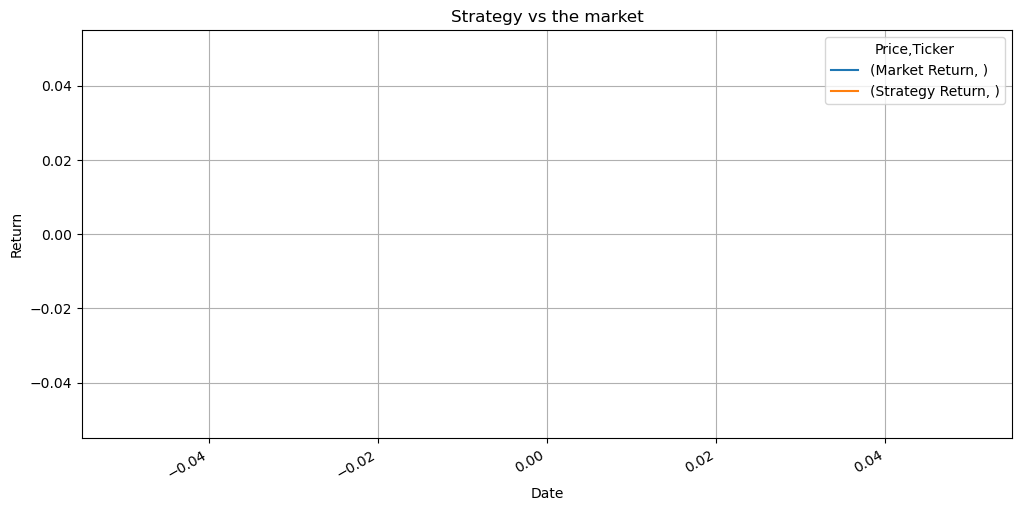

In [44]:
(1 + data[['Market Return' , 'Strategy Return' ]]).cumprod().plot(figsize=(12,6))
plt.title('Strategy vs the market')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid()
plt.show()